In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install prettytable

In [3]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from prettytable import PrettyTable

In [4]:
def dataframe_to_prettytable(df):
    table = PrettyTable()
    table.field_names = df.columns.tolist()
    for index, row in df.iterrows():
        table.add_row(row.tolist())
    return table

In [5]:
# Upload file
users_df = pd.read_csv('/content/drive/MyDrive/recommendation_system/data/users.csv')

# Read file
pretty_table = dataframe_to_prettytable(users_df.head())
print(pretty_table)

+----------------+----+------------------------------------------------------------------------------------------+-------------------+--------------------------------------+-----------------+-------------------+------------------+---------------------------+------------------+-----------------+---------------------+--------------------------+--------------------------+---------------+-------------------------+
|     model      | pk |                                     fields.password                                      | fields.last_login |           fields.public_id           | fields.username | fields.first_name | fields.last_name |        fields.email       | fields.is_active | fields.is_staff | fields.is_superuser |      fields.created      |      fields.updated      | fields.groups | fields.user_permissions |
+----------------+----+------------------------------------------------------------------------------------------+-------------------+--------------------------------------

In [6]:
# Upload file
products_df = pd.read_csv('/content/drive/MyDrive/recommendation_system/data/products.csv')

# Read file
pretty_table = dataframe_to_prettytable(products_df.head())
print(pretty_table)

+----------------------+----+--------------------------------------+--------------------------+--------------------------+---------------+-------------------------------+----------------------------------------+--------------+---------------+
|        model         | pk |           fields.public_id           |      fields.created      |      fields.updated      | fields.author |          fields.name          |           fields.description           | fields.price | fields.edited |
+----------------------+----+--------------------------------------+--------------------------+--------------------------+---------------+-------------------------------+----------------------------------------+--------------+---------------+
| core_product.product | 1  | 03f527a4-14d9-4598-800b-003c1c9f20fb | 2024-08-30T14:19:07.349Z | 2024-08-30T14:19:07.349Z |       1       |   The old iphone 10 pro max   | The new era begins and stay alwasy new |    770.0     |     False     |
| core_product.product | 2  

In [7]:
# Upload file
reviews_df = pd.read_csv('/content/drive/MyDrive/recommendation_system/data/reviews.csv')

# Read file
pretty_table = dataframe_to_prettytable(reviews_df.head())
print(pretty_table)

+---------------------+----+--------------------------------------+--------------------------+--------------------------+----------------+---------------+---------------+---------------------------------------------------------------------------------------------------------+---------------+
|        model        | pk |           fields_public_id           |      fields_created      |      fields_updated      | fields_product | fields_author | fields_rating |                                              fields_comment                                             | fields_edited |
+---------------------+----+--------------------------------------+--------------------------+--------------------------+----------------+---------------+---------------+---------------------------------------------------------------------------------------------------------+---------------+
| core_reviews.review | 1  | 1335c84a-33d9-40c1-9fd8-bfdd0af6d838 | 2024-08-31T12:38:24.693Z | 2024-08-31T12:38:24.693Z |

In [ ]:
# Display the columns of each DataFrame
print("Users DataFrame columns:")
print(users_df.columns.tolist())


Users DataFrame columns:
['model', 'pk', 'fields.password', 'fields.last_login', 'fields.public_id', 'fields.username', 'fields.first_name', 'fields.last_name', 'fields.email', 'fields.is_active', 'fields.is_staff', 'fields.is_superuser', 'fields.created', 'fields.updated', 'fields.groups', 'fields.user_permissions']


In [ ]:
print("\nProducts DataFrame columns:")
print(products_df.columns.tolist())


Products DataFrame columns:
['model', 'pk', 'fields.public_id', 'fields.created', 'fields.updated', 'fields.author', 'fields.name', 'fields.description', 'fields.price', 'fields.edited']


In [ ]:
print("\nReviews DataFrame columns:")
print(reviews_df.columns.tolist())


Reviews DataFrame columns:
['model', 'pk', 'fields_public_id', 'fields_created', 'fields_updated', 'fields_product', 'fields_author', 'fields_rating', 'fields_comment', 'fields_edited']


In [8]:
# Rename columns for easier access
products_df.rename(columns={
    'fields_public_id': 'product_public_id',
    'fields_created': 'product_created',
    'fields_updated': 'product_updated',
    'fields_author': 'product_author_id',
    'fields_name': 'product_name',
    'fields_description': 'product_description',
    'fields_price': 'product_price',
    'fields_edited': 'product_edited'
}, inplace=True)

reviews_df.rename(columns={
    'fields_public_id': 'review_public_id',
    'fields_created': 'review_created',
    'fields_updated': 'review_updated',
    'fields_product': 'product_id',
    'fields_author': 'author_id',
    'fields_rating': 'review_rating',
    'fields_comment': 'review_comment',
    'fields_edited': 'review_edited'
}, inplace=True)

users_df.rename(columns={
    'fields_public_id': 'user_public_id',
    'fields_username': 'user_username',
    'fields_first_name': 'user_first_name',
    'fields_last_name': 'user_last_name',
    'fields_email': 'user_email',
    'fields_is_active': 'user_is_active',
    'fields_is_staff': 'user_is_staff',
    'fields_is_superuser': 'user_is_superuser',
    'fields_created': 'user_created',
    'fields_updated': 'user_updated'
}, inplace=True)

In [9]:
# Check columns and data types
print("Reviews columns:", reviews_df.columns)
print("Products columns:", products_df.columns)
print("Users columns:", users_df.columns)

print("Reviews author_id type:", reviews_df['author_id'].dtype)
print("Users pk type:", users_df['pk'].dtype)

Reviews columns: Index(['model', 'pk', 'review_public_id', 'review_created', 'review_updated',
       'product_id', 'author_id', 'review_rating', 'review_comment',
       'review_edited'],
      dtype='object')
Products columns: Index(['model', 'pk', 'fields.public_id', 'fields.created', 'fields.updated',
       'fields.author', 'fields.name', 'fields.description', 'fields.price',
       'fields.edited'],
      dtype='object')
Users columns: Index(['model', 'pk', 'fields.password', 'fields.last_login',
       'fields.public_id', 'fields.username', 'fields.first_name',
       'fields.last_name', 'fields.email', 'fields.is_active',
       'fields.is_staff', 'fields.is_superuser', 'fields.created',
       'fields.updated', 'fields.groups', 'fields.user_permissions'],
      dtype='object')
Reviews author_id type: int64
Users pk type: int64


In [10]:
# Merge reviews with products
reviews_with_products = reviews_df.merge(products_df, left_on='product_id', right_on='pk', suffixes=('_review', '_product'))

# Ensure type consistency for merging
reviews_with_products['author_id'] = reviews_with_products['author_id'].astype(int)
users_df['pk'] = users_df['pk'].astype(int)

# Merge with users
reviews_with_details = reviews_with_products.merge(users_df, left_on='author_id', right_on='pk', suffixes=('_product', '_user'))


In [ ]:
# Display the merged DataFrame
pretty_table = dataframe_to_prettytable(reviews_with_details.head())
print(pretty_table)

+---------------------+-----------+--------------------------------------+--------------------------+--------------------------+------------+-----------+---------------+---------------------------------------------------------------------------------------------------------+---------------+----------------------+------------+--------------------------------------+--------------------------+--------------------------+---------------+------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------+---------------+----------------+----+------------------------------------------------------------------------------------------+-------------------+--------------------------------------+-----------------+-------------------+------------------+---------------------------+------------------+-----------------+---------------------+

In [11]:
# Load spaCy tokenizer
nlp = spacy.load('en_core_web_sm')

In [12]:
# Apply tokenization to review comments
reviews_with_details['tokens'] = reviews_with_details['review_comment'].apply(lambda x: [token.text for token in nlp(x)])

In [13]:
# Display the first few rows with tokens
pretty_table = dataframe_to_prettytable(reviews_with_details[['review_comment', 'tokens']].head())
print(pretty_table)

+---------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                              review_comment                                             |                                                                                                                                                     tokens                                                                                                                                                    |
+---------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [16]:
# Apply stop-word removal to tokens
def remove_stop_words(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

reviews_with_details['filtered_tokens'] = reviews_with_details['tokens'].apply(remove_stop_words)

In [17]:
# Display the first few rows with filtered tokens
pretty_table = dataframe_to_prettytable(reviews_with_details[['review_comment', 'tokens', 'filtered_tokens']].head())
print(pretty_table)

+---------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                              review_comment                                             |                                                                                                                                                     tokens                                             

In [18]:
# Function to perform lemmatization
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Convert list of tokens back to a string
    return [token.lemma_ for token in doc if token.lemma_ not in stop_words and not token.is_punct]

In [19]:
# Apply lemmatization
reviews_with_details['filtered_tokens'] = reviews_with_details['tokens'].apply(lambda x: lemmatize_tokens(x))

In [20]:
# Display the table
pretty_table = dataframe_to_prettytable(reviews_with_details[['review_comment', 'tokens', 'filtered_tokens']].head())
print(pretty_table)

+---------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                              review_comment                                             |                                                                                                                                                     tokens                                                                     

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine filtered tokens back into strings for vectorization
reviews_with_details['filtered_text'] = reviews_with_details['filtered_tokens'].apply(lambda x: ' '.join(x))

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(reviews_with_details['filtered_text'])

# Display the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (54, 610)


In [22]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between the TF-IDF vectors
similarity_matrix = cosine_similarity(tfidf_matrix)

# Display the shape of the similarity matrix
print("Cosine Similarity Matrix Shape:", similarity_matrix.shape)

# display the first few rows of the similarity matrix to understand the structure
print(similarity_matrix[:5, :5])  # Displaying a 5x5 slice of the matrix

Cosine Similarity Matrix Shape: (54, 54)
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.18950698 0.        ]
 [0.         0.         1.         0.         0.12958234]
 [0.         0.18950698 0.         1.         0.        ]
 [0.         0.         0.12958234 0.         1.        ]]


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = reviews_with_details[reviews_with_details['review_rating'] == 5]  # The class with the most samples
df_minority_1 = reviews_with_details[reviews_with_details['review_rating'] == 0]
df_minority_2 = reviews_with_details[reviews_with_details['review_rating'] == 4]
df_minority_3 = reviews_with_details[reviews_with_details['review_rating'] == 2]
df_minority_4 = reviews_with_details[reviews_with_details['review_rating'] == 3]
df_minority_5 = reviews_with_details[reviews_with_details['review_rating'] == 1]

# Upsample the minority classes
df_minority_1_upsampled = resample(df_minority_1, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_2_upsampled = resample(df_minority_2, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_3_upsampled = resample(df_minority_3, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_4_upsampled = resample(df_minority_4, replace=True, n_samples=len(df_majority), random_state=42)
df_minority_5_upsampled = resample(df_minority_5, replace=True, n_samples=len(df_majority), random_state=42)

# Combine majority class with upsampled minority classes
reviews_balanced = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled,
                              df_minority_3_upsampled, df_minority_4_upsampled, df_minority_5_upsampled])

# Define X (features) and y (target)
X = tfidf_matrix[reviews_balanced.index]
y = reviews_balanced['review_rating']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Use SMOTE for data balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']  # Optimization algorithms
}

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Train GridSearchCV on the balanced data
grid_search.fit(X_train_smote, y_train_smote)

# Output the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model for predictions on the test set
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Output the evaluation results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Best Hyperparameters: {'C': 10, 'solver': 'sag'}
Precision: 0.9583333333333334
Recall: 0.9444444444444445
F1-Score: 0.942857142857143
RMSE: 0.8944271909999159
MAE: 0.2


<ipython-input-24-83226fb42e3d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metric_values, palette="Blues_d")


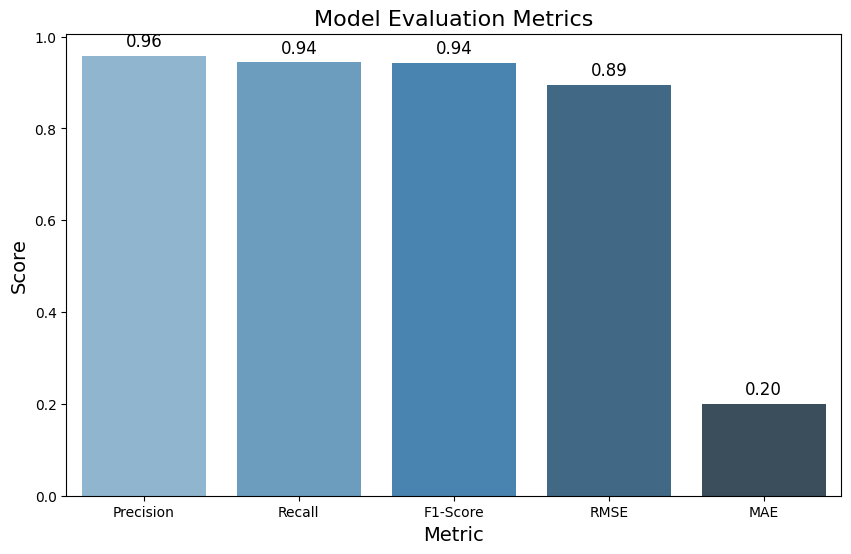

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary with the metrics
metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'RMSE': rmse,
    'MAE': mae
}

# Convert the dictionary into a list of tuples for easier plotting
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

# Set up the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_names, y=metric_values, palette="Blues_d")

# Add titles and labels
plt.title('Model Evaluation Metrics', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Show the exact metric values on top of the bars
for index, value in enumerate(metric_values):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

# Show the plot
plt.show()

In [ ]:
import joblib

# Save the trained model to the recommendation_system folder
joblib.dump(best_log_reg, '/content/drive/MyDrive/recommendation_system/logistic_regression_model.pkl')

# Save the TF-IDF vectorizer to the recommendation_system folder
joblib.dump(vectorizer, '/content/drive/MyDrive/recommendation_system/tfidf_vectorizer.pkl')

print("Model and TF-IDF vectorizer saved successfully in the recommendation_system folder.")

Model and TF-IDF vectorizer saved successfully in the recommendation_system folder.
